In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from tensorflow import keras

In [5]:
dataset_path=keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 11us/step


'/Users/shivaganesh/.keras/datasets/auto-mpg.data'

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_data=pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset=raw_data.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [16]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
#dropping the null valued rows
dataset=dataset.dropna()
dataset.shape

(392, 8)

In [20]:
#converting integer values to string for one-hot encoding
dataset['Origin']=dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [23]:
dataset=pd.get_dummies(dataset,prefix='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,_Europe,_Japan,_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [24]:
#changing the names of the new added columns
dataset.rename(columns={'_Europe':'Europe','_USA':'USA','_Japan':'Japan'},inplace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [26]:
#splitting the dataset into training and testing dataset`
train_dataset=dataset.sample(frac=0.8,random_state=123)
test_dataset=dataset.drop(train_dataset.index)

In [28]:
train_dataset.shape,test_dataset.shape

((314, 10), (78, 10))

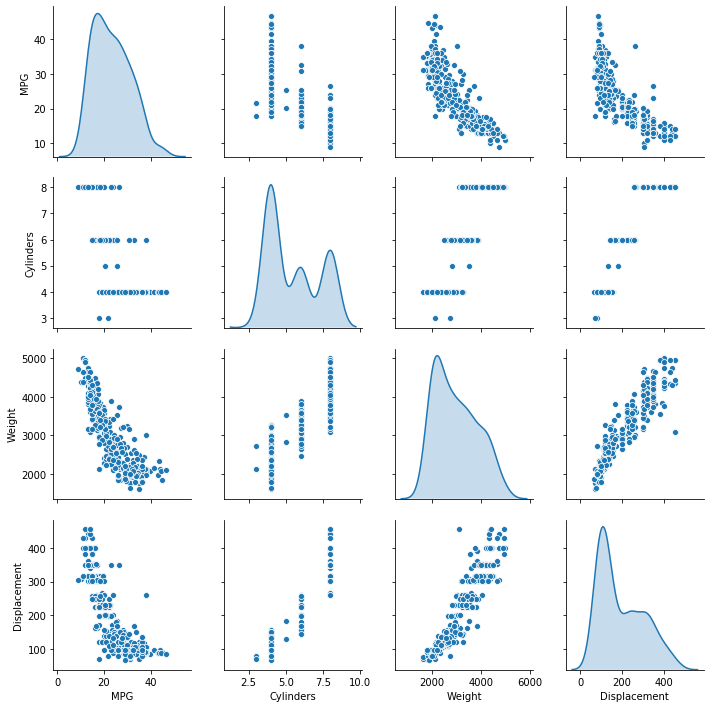

In [30]:
sns.pairplot(train_dataset[['MPG','Cylinders','Weight','Displacement']],diag_kind='kde')

In [31]:
#seperating labels from the training and testing samples
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

In [35]:
train_stats=train_dataset.describe()


In [36]:
#transpose of the dataframe
train_stats=train_stats.transpose()

In [37]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.515924,1.716692,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,196.334395,106.203582,68.0,101.75,151.0,302.00,455.0
Horsepower,314.0,104.885350,39.485666,46.0,75.00,95.0,129.75,230.0
Weight,314.0,2989.687898,861.874396,1613.0,2202.75,2850.0,3641.75,4997.0
Acceleration,314.0,15.521656,2.831189,8.0,13.70,15.5,17.00,24.8
Model Year,314.0,75.958599,3.619464,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.184713,0.388684,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.191083,0.393782,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [38]:
#normalising the dataset
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

In [39]:
#we use same train stats for normalising test dataset also.
normed_train_dataset=norm(train_dataset)
normed_test_dataset=norm(test_dataset)

In [42]:
#Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(32,activation='relu',input_shape=[len(train_dataset.keys())]),
    Dense(32,activation='relu'),
    Dense(1)
])



In [44]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='mse',metrics=['mse','mae'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [52]:
history=model.fit(normed_train_dataset,train_labels,epochs=400,verbose=1,validation_split=0.2)

Train on 251 samples, validate on 63 samples
Epoch 1/400
251/251 [==============================] - 0s 411us/sample - loss: 5.2161 - mse: 5.2161 - mae: 1.5609 - val_loss: 4.4339 - val_mse: 4.4339 - val_mae: 1.6734
Epoch 2/400
251/251 [==============================] - 0s 115us/sample - loss: 5.2288 - mse: 5.2288 - mae: 1.5530 - val_loss: 4.3435 - val_mse: 4.3435 - val_mae: 1.6714
Epoch 3/400
251/251 [==============================] - 0s 125us/sample - loss: 5.2651 - mse: 5.2651 - mae: 1.5559 - val_loss: 4.7603 - val_mse: 4.7603 - val_mae: 1.7163
Epoch 4/400
251/251 [==============================] - 0s 111us/sample - loss: 5.3662 - mse: 5.3662 - mae: 1.5694 - val_loss: 5.0454 - val_mse: 5.0454 - val_mae: 1.7583
Epoch 5/400
251/251 [==============================] - 0s 81us/sample - loss: 5.1594 - mse: 5.1594 - mae: 1.5436 - val_loss: 4.7197 - val_mse: 4.7197 - val_mae: 1.7039
Epoch 6/400
251/251 [==============================] - 0s 94us/sample - loss: 5.1229 - mse: 5.1229 - mae: 1.553

251/251 [==============================] - 0s 97us/sample - loss: 5.0376 - mse: 5.0376 - mae: 1.5357 - val_loss: 5.4094 - val_mse: 5.4094 - val_mae: 1.8245
Epoch 50/400
251/251 [==============================] - 0s 76us/sample - loss: 4.9899 - mse: 4.9899 - mae: 1.5244 - val_loss: 5.2265 - val_mse: 5.2265 - val_mae: 1.8022
Epoch 51/400
251/251 [==============================] - 0s 76us/sample - loss: 4.9976 - mse: 4.9976 - mae: 1.5312 - val_loss: 5.6787 - val_mse: 5.6787 - val_mae: 1.8643
Epoch 52/400
251/251 [==============================] - 0s 71us/sample - loss: 4.9277 - mse: 4.9277 - mae: 1.5402 - val_loss: 5.3742 - val_mse: 5.3742 - val_mae: 1.8242
Epoch 53/400
251/251 [==============================] - 0s 71us/sample - loss: 4.9912 - mse: 4.9912 - mae: 1.5320 - val_loss: 5.7745 - val_mse: 5.7745 - val_mae: 1.8776
Epoch 54/400
251/251 [==============================] - 0s 74us/sample - loss: 4.9381 - mse: 4.9381 - mae: 1.5267 - val_loss: 5.3678 - val_mse: 5.3678 - val_mae: 1.8173

251/251 [==============================] - 0s 107us/sample - loss: 4.8847 - mse: 4.8847 - mae: 1.5267 - val_loss: 5.4437 - val_mse: 5.4437 - val_mae: 1.8456
Epoch 98/400
251/251 [==============================] - 0s 96us/sample - loss: 4.7939 - mse: 4.7939 - mae: 1.5092 - val_loss: 5.5000 - val_mse: 5.5000 - val_mae: 1.8526
Epoch 99/400
251/251 [==============================] - 0s 90us/sample - loss: 5.0138 - mse: 5.0138 - mae: 1.5330 - val_loss: 5.3457 - val_mse: 5.3457 - val_mae: 1.8321
Epoch 100/400
251/251 [==============================] - 0s 88us/sample - loss: 4.8515 - mse: 4.8515 - mae: 1.5133 - val_loss: 5.5323 - val_mse: 5.5323 - val_mae: 1.8507
Epoch 101/400
251/251 [==============================] - 0s 107us/sample - loss: 4.8200 - mse: 4.8200 - mae: 1.5111 - val_loss: 5.2224 - val_mse: 5.2224 - val_mae: 1.8154
Epoch 102/400
251/251 [==============================] - 0s 77us/sample - loss: 4.8277 - mse: 4.8277 - mae: 1.4939 - val_loss: 6.0187 - val_mse: 6.0187 - val_mae: 1

251/251 [==============================] - 0s 88us/sample - loss: 4.6964 - mse: 4.6964 - mae: 1.4880 - val_loss: 5.3674 - val_mse: 5.3674 - val_mae: 1.8502
Epoch 146/400
251/251 [==============================] - 0s 84us/sample - loss: 4.8524 - mse: 4.8524 - mae: 1.5315 - val_loss: 5.6931 - val_mse: 5.6931 - val_mae: 1.8732
Epoch 147/400
251/251 [==============================] - 0s 79us/sample - loss: 4.7910 - mse: 4.7910 - mae: 1.5142 - val_loss: 5.2880 - val_mse: 5.2880 - val_mae: 1.8351
Epoch 148/400
251/251 [==============================] - 0s 81us/sample - loss: 4.7665 - mse: 4.7665 - mae: 1.4990 - val_loss: 5.2336 - val_mse: 5.2336 - val_mae: 1.8399
Epoch 149/400
251/251 [==============================] - 0s 78us/sample - loss: 4.7372 - mse: 4.7372 - mae: 1.5081 - val_loss: 5.1241 - val_mse: 5.1241 - val_mae: 1.8290
Epoch 150/400
251/251 [==============================] - 0s 78us/sample - loss: 4.6918 - mse: 4.6918 - mae: 1.4977 - val_loss: 5.7339 - val_mse: 5.7339 - val_mae: 1

251/251 [==============================] - 0s 79us/sample - loss: 4.6150 - mse: 4.6150 - mae: 1.5036 - val_loss: 5.7538 - val_mse: 5.7538 - val_mae: 1.8825
Epoch 194/400
251/251 [==============================] - 0s 80us/sample - loss: 4.6555 - mse: 4.6555 - mae: 1.4456 - val_loss: 5.7857 - val_mse: 5.7857 - val_mae: 1.8897
Epoch 195/400
251/251 [==============================] - 0s 82us/sample - loss: 4.6226 - mse: 4.6226 - mae: 1.4605 - val_loss: 5.6505 - val_mse: 5.6505 - val_mae: 1.8890
Epoch 196/400
251/251 [==============================] - 0s 83us/sample - loss: 4.5711 - mse: 4.5711 - mae: 1.4893 - val_loss: 5.1644 - val_mse: 5.1644 - val_mae: 1.8324
Epoch 197/400
251/251 [==============================] - 0s 111us/sample - loss: 4.7360 - mse: 4.7360 - mae: 1.4923 - val_loss: 5.5473 - val_mse: 5.5473 - val_mae: 1.8628
Epoch 198/400
251/251 [==============================] - 0s 104us/sample - loss: 4.6948 - mse: 4.6948 - mae: 1.4834 - val_loss: 5.6701 - val_mse: 5.6701 - val_mae:

251/251 [==============================] - 0s 109us/sample - loss: 4.4948 - mse: 4.4948 - mae: 1.4629 - val_loss: 5.8685 - val_mse: 5.8685 - val_mae: 1.9017
Epoch 242/400
251/251 [==============================] - 0s 103us/sample - loss: 4.5280 - mse: 4.5280 - mae: 1.4684 - val_loss: 5.9486 - val_mse: 5.9486 - val_mae: 1.9192
Epoch 243/400
251/251 [==============================] - 0s 92us/sample - loss: 4.5051 - mse: 4.5051 - mae: 1.4411 - val_loss: 6.1530 - val_mse: 6.1530 - val_mae: 1.9209
Epoch 244/400
251/251 [==============================] - 0s 103us/sample - loss: 4.5051 - mse: 4.5051 - mae: 1.4533 - val_loss: 5.6965 - val_mse: 5.6965 - val_mae: 1.8823
Epoch 245/400
251/251 [==============================] - 0s 95us/sample - loss: 4.5027 - mse: 4.5027 - mae: 1.4441 - val_loss: 5.7227 - val_mse: 5.7227 - val_mae: 1.8808
Epoch 246/400
251/251 [==============================] - 0s 100us/sample - loss: 4.4961 - mse: 4.4961 - mae: 1.4515 - val_loss: 5.7043 - val_mse: 5.7043 - val_ma

251/251 [==============================] - 0s 83us/sample - loss: 4.3361 - mse: 4.3361 - mae: 1.4249 - val_loss: 6.1619 - val_mse: 6.1619 - val_mae: 1.9360
Epoch 290/400
251/251 [==============================] - 0s 84us/sample - loss: 4.4550 - mse: 4.4550 - mae: 1.4323 - val_loss: 5.9317 - val_mse: 5.9317 - val_mae: 1.9039
Epoch 291/400
251/251 [==============================] - 0s 81us/sample - loss: 4.3771 - mse: 4.3771 - mae: 1.4400 - val_loss: 5.4521 - val_mse: 5.4521 - val_mae: 1.8711
Epoch 292/400
251/251 [==============================] - 0s 89us/sample - loss: 4.2837 - mse: 4.2837 - mae: 1.4277 - val_loss: 6.6350 - val_mse: 6.6350 - val_mae: 1.9948
Epoch 293/400
251/251 [==============================] - 0s 82us/sample - loss: 4.4252 - mse: 4.4252 - mae: 1.4682 - val_loss: 6.0237 - val_mse: 6.0237 - val_mae: 1.9351
Epoch 294/400
251/251 [==============================] - 0s 84us/sample - loss: 4.2580 - mse: 4.2580 - mae: 1.4000 - val_loss: 5.6827 - val_mse: 5.6827 - val_mae: 1

251/251 [==============================] - 0s 79us/sample - loss: 4.2662 - mse: 4.2662 - mae: 1.4000 - val_loss: 6.8619 - val_mse: 6.8619 - val_mae: 2.0314
Epoch 338/400
251/251 [==============================] - 0s 81us/sample - loss: 4.3054 - mse: 4.3054 - mae: 1.4264 - val_loss: 7.2306 - val_mse: 7.2306 - val_mae: 2.0832
Epoch 339/400
251/251 [==============================] - 0s 75us/sample - loss: 4.2667 - mse: 4.2667 - mae: 1.4223 - val_loss: 5.7495 - val_mse: 5.7495 - val_mae: 1.9121
Epoch 340/400
251/251 [==============================] - 0s 76us/sample - loss: 4.2427 - mse: 4.2427 - mae: 1.3871 - val_loss: 6.9102 - val_mse: 6.9102 - val_mae: 2.0245
Epoch 341/400
251/251 [==============================] - 0s 78us/sample - loss: 4.2398 - mse: 4.2398 - mae: 1.4164 - val_loss: 5.7131 - val_mse: 5.7131 - val_mae: 1.9116
Epoch 342/400
251/251 [==============================] - 0s 78us/sample - loss: 4.2178 - mse: 4.2178 - mae: 1.3822 - val_loss: 6.4591 - val_mse: 6.4591 - val_mae: 1

251/251 [==============================] - 0s 78us/sample - loss: 4.1141 - mse: 4.1141 - mae: 1.3753 - val_loss: 6.1799 - val_mse: 6.1799 - val_mae: 1.9464
Epoch 386/400
251/251 [==============================] - 0s 78us/sample - loss: 4.0829 - mse: 4.0829 - mae: 1.3814 - val_loss: 5.7886 - val_mse: 5.7886 - val_mae: 1.9122
Epoch 387/400
251/251 [==============================] - 0s 75us/sample - loss: 4.1333 - mse: 4.1333 - mae: 1.3697 - val_loss: 6.4823 - val_mse: 6.4823 - val_mae: 1.9995
Epoch 388/400
251/251 [==============================] - 0s 76us/sample - loss: 4.0269 - mse: 4.0269 - mae: 1.3418 - val_loss: 6.5635 - val_mse: 6.5635 - val_mae: 1.9970
Epoch 389/400
251/251 [==============================] - 0s 75us/sample - loss: 4.1848 - mse: 4.1848 - mae: 1.4131 - val_loss: 6.2914 - val_mse: 6.2914 - val_mae: 1.9635
Epoch 390/400
251/251 [==============================] - 0s 80us/sample - loss: 4.0122 - mse: 4.0122 - mae: 1.3720 - val_loss: 6.8605 - val_mse: 6.8605 - val_mae: 2

In [53]:
hist=pd.DataFrame(history.history)

In [55]:
hist.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,5.216060,5.216060,1.560913,4.433861,4.433861,1.673422
1,5.228804,5.228804,1.553002,4.343549,4.343548,1.671417
2,5.265133,5.265133,1.555859,4.760332,4.760333,1.716336
3,5.366226,5.366226,1.569443,5.045394,5.045393,1.758299
4,5.159410,5.159410,1.543567,4.719687,4.719687,1.703889


In [56]:
hist['epoch']=history.epoch
hist.head()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,5.216060,5.216060,1.560913,4.433861,4.433861,1.673422,0
1,5.228804,5.228804,1.553002,4.343549,4.343548,1.671417,1
2,5.265133,5.265133,1.555859,4.760332,4.760333,1.716336,2
3,5.366226,5.366226,1.569443,5.045394,5.045393,1.758299,3
4,5.159410,5.159410,1.543567,4.719687,4.719687,1.703889,4


In [66]:
test_preds=model.predict(normed_test_dataset).flatten()

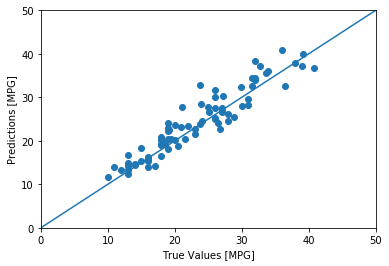

In [79]:
a=plt.axes()
plt.scatter(test_labels,test_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_= plt.plot(lims, lims)


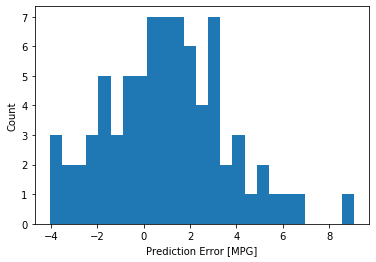

In [91]:
error = test_preds - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_=plt.ylabel('Count')